In [1]:
#Improving Previous Model Accuracy

In [2]:
import os
import zipfile
import requests
import torchvision
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
from torch import nn
from typing import Dict, List, Tuple
import pandas as pd
import matplotlib.pyplot as plt
from torchinfo import summary

In [3]:
data_path= Path("Food/")
image_path= data_path/"pizza_steak_sushi"

# if image_path.is_dir():
#     print(f"{image_path} already exist.")
# else:
#     image_path.mkdir(parents=True, exist_ok=True)

    
    
##Iturnign off this to sae time
# with open(data_path/"pizza_steak_sushi.zip", 'wb') as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#     print('downloading data')
#     f.write(request.content)
        
# with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
#     print('Unzipping food data')
#     zip_ref.extractall(image_path)

In [4]:
#removing zip file
# os.remove(data_path / "pizza_steak_sushi.zip")

In [5]:
#training and testing pth
train_dir=image_path/'train'
test_dir=image_path/'test'

In [6]:
train_dir, test_dir

(WindowsPath('Food/pizza_steak_sushi/train'),
 WindowsPath('Food/pizza_steak_sushi/test'))

In [7]:
#import datasets, transform
data_transform=transforms.Compose([transforms.Resize((64, 64)),
                                   transforms.ToTensor()])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Food\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 80
     Root location: Food\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [8]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"Image tensor:\n{img}")

Image shape: torch.Size([3, 64, 64]) -> [batch_size, color_channels, height, width]
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>
Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.019

In [9]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [11]:
len(train_data), len(test_data)

(225, 80)

In [12]:
# Turning Train and testing data into dataloaders
train_dataloader= DataLoader(dataset=train_data,
                             batch_size=32,
                             num_workers=4,
                             shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=32,
                            num_workers=4,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23654f042f0>,
 <torch.utils.data.dataloader.DataLoader at 0x23653d73b10>)

In [13]:
len(train_dataloader), len(test_dataloader),

(8, 3)

In [14]:
#checking
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [15]:
#Making Model

In [16]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape:int, hidden_unit:int, output_shape:int)-> None:
        super().__init__()
        self.conv_bloc_1=nn.Sequential(nn.Conv2d(in_channels=input_shape,out_channels=hidden_unit,kernel_size=3, stride=1, padding=0),
                                       nn.ReLU(),
                                       nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=0),
                                       nn.ReLU(),
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.conv_bloc_2=nn.Sequential(nn.Conv2d(hidden_unit, hidden_unit, kernel_size=3, padding=0),
                                       nn.ReLU(),
                                       nn.Conv2d(hidden_unit, hidden_unit, kernel_size=3, padding=0),
                                       nn.ReLU(),
                                       nn.MaxPool2d(2))
        
        self.classifier =nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features=hidden_unit*13*13,out_features=output_shape)) #Hardcoded
        
    def forward(self, x:torch.tensor):
        x=self.conv_bloc_1(x)
        x=self.conv_bloc_2(x)
        x=self.classifier(x)
        return x

In [17]:
torch.manual_seed(42)
model_1=TinyVGG(input_shape=3, hidden_unit=10, output_shape=len(train_data.classes))
model_1

TinyVGG(
  (conv_bloc_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_bloc_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [18]:
# To test our model

In [19]:
img_batch, batch_label=next(iter(train_dataloader))
img_single, label_single=img_batch[0].unsqueeze(dim=0), batch_label[0]
img_single.shape

torch.Size([1, 3, 64, 64])

In [20]:
model_1.eval()
with torch.inference_mode():
    pred=model_1(img_single)

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Output logits:
tensor([[ 0.0208, -0.0020,  0.0095]])

Output prediction probabilities:
tensor([[0.3371, 0.3295, 0.3333]])

Output prediction label:
tensor([0])

Actual label:
0


In [21]:
#making train

In [22]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer)-> Tuple[float, float]:
    model.train()
    train_loss, train_acc=0,0

    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)

        loss=loss_fn(y_pred, y)
        train_loss+=loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    train_loss= train_loss/len(dataloader)
    train_acc= train_acc/len(dataloader)

    return train_loss, train_acc

In [23]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module) -> Tuple[float, float]:
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in dataloader:
            test_pred_logits = model(X)

            loss=loss_fn(test_pred_logits, y)
            test_loss+=loss.item()

            test_pred_labels= test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels==y).sum().item()/len(test_pred_labels))

    test_loss=test_loss/len(dataloader)
    test_acc=test_acc/len(dataloader)
    return test_loss, test_acc

In [24]:
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          epochs:int)-> Dict[str, list[float]]:

    
    results={"train_loss": [],
             "train_acc" : [],
             "test_loss" : [],
             "test_acc" : []}
    
    for epoch in range(epochs):
        train_loss, train_acc= train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)
                                          
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
                                          
        print(f"Epochs : {epoch+1} | "
              f"Train_loss : {train_loss :4f} | "
              f"Train_acc : {train_acc:.4f} | "
              f"Test_loss : {test_loss:.4f} | "
              f"Test_acc : {test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
                                          
    return results                                        

In [25]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_unit=64,
                  output_shape=len(train_data.classes))

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001, weight_decay=1e-4)


results = train(model=model_1,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                epochs=10)

Epochs : 1 | Train_loss : 1.103653 | Train_acc : 0.3320 | Test_loss : 1.0796 | Test_acc : 0.3021
Epochs : 2 | Train_loss : 1.027307 | Train_acc : 0.4023 | Test_loss : 1.0483 | Test_acc : 0.3542
Epochs : 3 | Train_loss : 0.813809 | Train_acc : 0.6211 | Test_loss : 1.0670 | Test_acc : 0.4271
Epochs : 4 | Train_loss : 0.750519 | Train_acc : 0.6523 | Test_loss : 1.0922 | Test_acc : 0.4688
Epochs : 5 | Train_loss : 0.765454 | Train_acc : 0.7031 | Test_loss : 1.3925 | Test_acc : 0.3750
Epochs : 6 | Train_loss : 0.893670 | Train_acc : 0.6406 | Test_loss : 1.0465 | Test_acc : 0.4896
Epochs : 7 | Train_loss : 0.790244 | Train_acc : 0.7266 | Test_loss : 1.0526 | Test_acc : 0.5000
Epochs : 8 | Train_loss : 0.798508 | Train_acc : 0.5859 | Test_loss : 1.0764 | Test_acc : 0.4896
Epochs : 9 | Train_loss : 0.854056 | Train_acc : 0.4805 | Test_loss : 1.0388 | Test_acc : 0.4167
Epochs : 10 | Train_loss : 0.901914 | Train_acc : 0.5469 | Test_loss : 1.0584 | Test_acc : 0.4479


In [26]:
model_1_df = pd.DataFrame(results)
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.103653,0.332031,1.079550,0.302083
1,1.027307,0.402344,1.048275,0.354167
2,0.813809,0.621094,1.066989,0.427083
3,0.750519,0.652344,1.092224,0.468750
4,0.765454,0.703125,1.392512,0.375000
5,0.893670,0.640625,1.046533,0.489583
6,0.790244,0.726562,1.052611,0.500000
7,0.798508,0.585938,1.076416,0.489583
8,0.854056,0.480469,1.038844,0.416667
9,0.901914,0.546875,1.058364,0.447917


In [27]:
summary(model_1,input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 64, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 64, 62, 62]           1,792
│    └─ReLU: 2-2                         [1, 64, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 64, 60, 60]           36,928
│    └─ReLU: 2-4                         [1, 64, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 64, 30, 30]           --
├─Sequential: 1-2                        [1, 64, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 64, 28, 28]           36,928
│    └─ReLU: 2-7                         [1, 64, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 64, 26, 26]           36,928
│    └─ReLU: 2-9                         [1, 64, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 64, 13, 13]           --


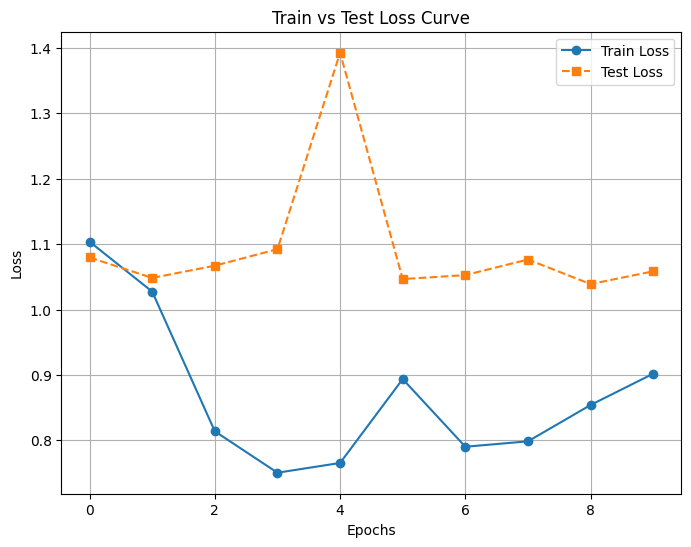

In [28]:
plt.figure(figsize=(8,6))
plt.plot(model_1_df["train_loss"], label="Train Loss", marker="o", linestyle="-")
plt.plot(model_1_df["test_loss"], label="Test Loss", marker="s", linestyle="--")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

## Making a new model

In [29]:
# train_transform = transforms.Compose([transforms.Resize((128, 128)),
#                                       transforms.RandomHorizontalFlip(p=0.5),
#                                       transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  transforms.ToTensor()])
# test_transform = transforms.Compose([transforms.Resize((64, 64)),
#                                      transforms.ToTensor()])


# from torchvision import transforms

# # Improved Train Transform (Data Augmentation)
# train_transform = transforms.Compose([transforms.Resize((128, 128)),
#                                       transforms.RandomHorizontalFlip(p=0.5),
#                                       transforms.RandomRotation(degrees=15),
#                                       transforms.RandomAffine(degrees=0,translate=(0.1, 0.1)),
#                                       transforms.ColorJitter(brightness=0.2, contrast=0.2),
#                                       transforms.RandomPerspective(distortion_scale=0.1, p=0.5),
#                                       transforms.ToTensor(),  
#                                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

# # Improved Test Transform (No Augmentation, Just Resize & Normalize)
# test_transform = transforms.Compose([transforms.Resize((128, 128)),
#                                      transforms.ToTensor(),
#                                      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


In [30]:
# train_transform, test_transform

In [31]:
train_dir, test_dir

(WindowsPath('Food/pizza_steak_sushi/train'),
 WindowsPath('Food/pizza_steak_sushi/test'))

In [32]:
# train_dataset = datasets.ImageFolder(root=train_dir,
#                                      transform=train_transform)

# test_dataset = datasets.ImageFolder(root=test_dir,
#                                     transform=test_transform)
# train_data, test_data

In [33]:
# class ImprovedVGG(nn.Module):
#     def __init__(self, input_shape, hidden_units, output_shape):
#         super().__init__()
#         self.conv_block_1 = nn.Sequential(
#             nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )
#         self.conv_block_2 = nn.Sequential(
#             nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units * 2, kernel_size=3, stride=1, padding=0),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units * 2, out_channels=hidden_units * 2, kernel_size=3, stride=1, padding=0),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )

#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(self._get_flattened_size((3, 64, 64), hidden_units), 512)
#         self.fc2 = nn.Linear(512, output_shape)
#         self.dropout = nn.Dropout(0.5)
#         self.relu = nn.ReLU()

#     def _get_flattened_size(self, input_shape, hidden_units):
#         """ Forward pass a dummy tensor to calculate the flattened size dynamically. """
#         with torch.no_grad():
#             x = torch.zeros(1, *input_shape)
#             x = self.conv_block_1(x)
#             x = self.conv_block_2(x)
#             return x.view(1, -1).shape[1]

#     def forward(self, x):
#         x = self.conv_block_1(x)
#         x = self.conv_block_2(x)
#         x = self.flatten(x)
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.dropout(x)
#         x = self.fc2(x)
#         return x


In [34]:
# optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01, weight_decay=1e-4)

In [35]:
# from torch.utils.data.sampler import WeightedRandomSampler


# class_counts = torch.bincount(torch.tensor(train_data.targets))
# class_weights = 1.0 / class_counts
# sample_weights = class_weights[train_data.targets]
# sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=sampler)

In [36]:
# torch.manual_seed(42)
# model_2 = ImprovedVGG(input_shape=3, hidden_units=64, output_shape=len(train_data.classes))

# optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01, weight_decay=1e-4)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# loss_fn = nn.CrossEntropyLoss()

# results_2 = train(model_2,
#                 train_dataloader,
#                 test_dataloader,
#                 loss_fn,
#                 optimizer,
#                 epochs=10)

## IMproving model

In [37]:
from torchvision.transforms import InterpolationMode

train_transform = transforms.Compose([transforms.Resize((64, 64),interpolation=InterpolationMode.BILINEAR,antialias=True),  # Ensure consistency
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomRotation(degrees=15, interpolation=InterpolationMode.NEAREST, fill=0),
                                      transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), fill=0),
                                      transforms.ColorJitter(brightness=0.3, contrast=0.3),
                                      transforms.RandomPerspective(distortion_scale=0.1, p=0.5),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

test_transform = transforms.Compose([transforms.Resize((64, 64), interpolation=InterpolationMode.BILINEAR, antialias=True),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

In [38]:
train_dir,test_dir

(WindowsPath('Food/pizza_steak_sushi/train'),
 WindowsPath('Food/pizza_steak_sushi/test'))

In [39]:
train_dataset = datasets.ImageFolder(root=train_dir,
                                     transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dir,
                                    transform=test_transform)

train_loader = DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=4)

test_loader = DataLoader(test_dataset,
                         batch_size=32,
                         shuffle=False,
                         num_workers=4)

print(f"Train dataset: {len(train_dataset)} images")
print(f"Test dataset: {len(test_dataset)} images")
print(f"Classes: {train_dataset.classes}")

Train dataset: 225 images
Test dataset: 80 images
Classes: ['pizza', 'steak', 'sushi']


In [40]:
class ImprovedVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
                                          nn.BatchNorm2d(hidden_units),
                                          nn.LeakyReLU(0.1),
                                          nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
                                          nn.BatchNorm2d(hidden_units),
                                          nn.LeakyReLU(0.1),
                                          nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units * 2, kernel_size=3, stride=1, padding=1),
                                          nn.BatchNorm2d(hidden_units * 2),
                                          nn.LeakyReLU(0.1),
                                          nn.Conv2d(in_channels=hidden_units * 2, out_channels=hidden_units * 2, kernel_size=3, stride=1, padding=1),
                                          nn.BatchNorm2d(hidden_units * 2),
                                          nn.LeakyReLU(0.1),
                                          nn.MaxPool2d(kernel_size=2, stride=2))
        # Flatten Layers
        self.flatten = nn.Flatten()
        flattened_size = self._get_flattened_size((3, 64, 64), hidden_units)
        self.fc1 = nn.Linear(flattened_size, 512)
        self.fc2 = nn.Linear(512, output_shape)
        self.dropout = nn.Dropout(0.5)
        self.leaky_relu = nn.LeakyReLU(0.1)

    def _get_flattened_size(self, input_shape, hidden_units):
        """ Forward pass a dummy tensor to calculate the flattened size dynamically. """
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.conv_block_1(x)
            x = self.conv_block_2(x)
            return x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 🔹 Model Initialization
model = ImprovedVGG(input_shape=3, hidden_units=64, output_shape=len(train_dataset.classes))
print(model)

ImprovedVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): MaxPool2d(kern

In [41]:
img_batch, batch_label=next(iter(train_dataloader))
print(len(img_batch))

32


In [42]:
img_batch, batch_label=next(iter(train_dataloader))
img_single, label_single=img_batch[0].unsqueeze(dim=0), batch_label[0]
img_single.shape

torch.Size([1, 3, 64, 64])

In [43]:
torch.manual_seed(42)

model_2= ImprovedVGG(input_shape=3,
                     hidden_units=64,
                     output_shape=len(train_data.classes))

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001, weight_decay=1e-4)


results = train(model=model_2,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                epochs=10)

Epochs : 1 | Train_loss : 18.876107 | Train_acc : 0.3984 | Test_loss : 8.6020 | Test_acc : 0.3542
Epochs : 2 | Train_loss : 8.755274 | Train_acc : 0.6211 | Test_loss : 3.8647 | Test_acc : 0.4062
Epochs : 3 | Train_loss : 4.816482 | Train_acc : 0.4570 | Test_loss : 3.5144 | Test_acc : 0.3646
Epochs : 4 | Train_loss : 3.298657 | Train_acc : 0.6602 | Test_loss : 3.4693 | Test_acc : 0.3854
Epochs : 5 | Train_loss : 2.243684 | Train_acc : 0.6172 | Test_loss : 2.0363 | Test_acc : 0.4062
Epochs : 6 | Train_loss : 1.582542 | Train_acc : 0.6797 | Test_loss : 1.6836 | Test_acc : 0.5521
Epochs : 7 | Train_loss : 1.274980 | Train_acc : 0.6836 | Test_loss : 2.0631 | Test_acc : 0.4375
Epochs : 8 | Train_loss : 1.233623 | Train_acc : 0.6094 | Test_loss : 1.5181 | Test_acc : 0.5104
Epochs : 9 | Train_loss : 1.324235 | Train_acc : 0.6875 | Test_loss : 2.1477 | Test_acc : 0.4688
Epochs : 10 | Train_loss : 1.171402 | Train_acc : 0.7070 | Test_loss : 2.5469 | Test_acc : 0.4062


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.transforms import InterpolationMode
import numpy as np

#Augmentation
train_transform = transforms.Compose([transforms.Resize((64, 64),interpolation=InterpolationMode.BILINEAR),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                                     ])

test_transform = transforms.Compose([transforms.Resize((64, 64),interpolation=InterpolationMode.BILINEAR),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                                    ])

In [45]:
#Load Dataset
train_dataset = datasets.ImageFolder(root=train_dir,
                                     transform=train_transform)

test_dataset = datasets.ImageFolder(root=test_dir,
                                    transform=test_transform)

train_loader = DataLoader(train_dataset,
                          batch_size=64,
                          shuffle=True,
                          num_workers=2)

test_loader = DataLoader(test_dataset,
                         batch_size=64,
                         shuffle=False,
                         num_workers=2)

print(f"Train dataset: {len(train_dataset)} images")
print(f"Test dataset: {len(test_dataset)} images")
print(f"Classes: {train_dataset.classes}")

Train dataset: 225 images
Test dataset: 80 images
Classes: ['pizza', 'steak', 'sushi']


In [46]:
# Model
class ImprovedVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units, momentum=0.1),
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units, momentum=0.1),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units * 2, momentum=0.1),
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels=hidden_units * 2, out_channels=hidden_units * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units * 2, momentum=0.1),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.flatten = nn.Flatten()
        flattened_size = self._get_flattened_size((3, 64, 64), hidden_units)
        self.fc1 = nn.Linear(flattened_size, 512)
        self.fc2 = nn.Linear(512, output_shape)
        self.dropout = nn.Dropout(0.6)  # Increased dropout to prevent overfitting
        self.leaky_relu = nn.LeakyReLU(0.1)

    def _get_flattened_size(self, input_shape, hidden_units):
        """ Forward pass a dummy tensor to calculate the flattened size dynamically. """
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.conv_block_1(x)
            x = self.conv_block_2(x)
            return x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [47]:
# Model Initialization
model = ImprovedVGG(input_shape=3, hidden_units=64, output_shape=len(train_dataset.classes))

# Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

In [48]:
#Training Function
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    total_loss, correct = 0.0, 0
    total_samples = 0

    for X, y in dataloader:
        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X.size(0)
        correct += (preds.argmax(dim=1) == y).sum().item()
        total_samples += X.size(0)

    return total_loss / total_samples, correct / total_samples

In [50]:
#Evaluation Function
def test_step(model, dataloader, loss_fn):
    model.eval()
    total_loss, correct = 0.0, 0
    total_samples = 0

    with torch.no_grad():
        for X, y in dataloader:
            preds = model(X)
            loss = loss_fn(preds, y)
            total_loss += loss.item() * X.size(0)
            correct += (preds.argmax(dim=1) == y).sum().item()
            total_samples += X.size(0)

    return total_loss / total_samples, correct / total_samples

In [52]:
best_test_loss = np.inf
patience, counter = 5, 0

for epoch in range(7):
    train_loss, train_acc = train_step(model, train_loader, criterion, optimizer)
    test_loss, test_acc = test_step(model, test_loader, criterion)

    # Reduce LR if test loss doesn't improve
    scheduler.step(test_loss)
    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    # Early Stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0  # Reset patience
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break  # Stop training

print("Training completed!")

Epoch 1 | Train Loss: 0.6899 | Train Acc: 0.7333 | Test Loss: 1.0003 | Test Acc: 0.5750
Epoch 2 | Train Loss: 0.7192 | Train Acc: 0.7022 | Test Loss: 1.0025 | Test Acc: 0.5625
Epoch 3 | Train Loss: 0.7073 | Train Acc: 0.7022 | Test Loss: 1.0138 | Test Acc: 0.5750
Epoch 4 | Train Loss: 0.7757 | Train Acc: 0.6933 | Test Loss: 1.0182 | Test Acc: 0.5750
Epoch 5 | Train Loss: 0.6871 | Train Acc: 0.7422 | Test Loss: 1.0120 | Test Acc: 0.5625
Epoch 6 | Train Loss: 0.6350 | Train Acc: 0.7378 | Test Loss: 1.0043 | Test Acc: 0.5625
Early stopping triggered!
Training completed!


In [53]:
best_test_loss =np.inf
patience, counter = 5, 0

# Lists to store loss and accuracy for plotting
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(7):
    train_loss, train_acc = train_step(model,
                                       train_loader,
                                       criterion,
                                       optimizer)
    test_loss, test_acc = test_step(model,
                                    test_loader,
                                    criterion)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    scheduler.step(test_loss)
    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    # Early Stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break
print("Training completed!")

Epoch 1 | Train Loss: 0.7152 | Train Acc: 0.7111 | Test Loss: 0.9969 | Test Acc: 0.5750
Epoch 2 | Train Loss: 0.6635 | Train Acc: 0.7600 | Test Loss: 0.9936 | Test Acc: 0.5750
Epoch 3 | Train Loss: 0.7019 | Train Acc: 0.7200 | Test Loss: 0.9946 | Test Acc: 0.5750
Epoch 4 | Train Loss: 0.6438 | Train Acc: 0.7422 | Test Loss: 0.9959 | Test Acc: 0.5750
Epoch 5 | Train Loss: 0.6648 | Train Acc: 0.7200 | Test Loss: 1.0009 | Test Acc: 0.6125
Epoch 6 | Train Loss: 0.6749 | Train Acc: 0.7333 | Test Loss: 1.0017 | Test Acc: 0.6125
Epoch 7 | Train Loss: 0.6982 | Train Acc: 0.7467 | Test Loss: 1.0054 | Test Acc: 0.6125
Early stopping triggered!
Training completed!
